In [5]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [6]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()


This is how maze looks like:

□ □ □ □ □
□ X □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [7]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [8]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    epsilon_0=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=200
                   )


In [9]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 19, 'reward': 1000.0, 'perf_time': 0.014679899999990198, 'numerosity': 88, 'population': 88, 'average_specificity': 2.227272727272727, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 7, 'reward': 1090.9557755093135, 'perf_time': 0.06831400000000087, 'numerosity': 1650, 'population': 957, 'average_specificity': 18.73090909090909, 'fraction_accuracy': 0.017783101045296165}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 3, 'reward': 1628.1335076814366, 'perf_time': 0.033511500000003025, 'numerosity': 1800, 'population': 1146, 'average_specificity': 21.773888888888887, 'fraction_accuracy': 0.027564102564102563}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 2, 'reward': 1775.4082438248972, 'perf_time': 0.024715899999989688, 'numerosity': 1800, 'population': 1173, 'average_specificity': 22.769444444444446, 'fraction_accuracy': 0.05624485696961823}
INFO:lcs.agents.Agent:{'trial': 400, 'steps

In [10]:
for cl in explore_population:
        print(str(cl))

Cond:....FO.. - Act:1 - effect:....FO.. - Num:2 [fit: 0.002, exp: 50.00, pred: 353.055, error:6337.943477712033]acc: 0.54
Cond:.#..FO.. - Act:5 - effect:....FO.. - Num:1 [fit: 0.009, exp: 182.00, pred: 496.703, error:4613.81658032312]acc: 0.6593406593406593
Cond:#....OF. - Act:5 - effect:........ - Num:1 [fit: 0.005, exp: 90.00, pred: 297.611, error:2670.2316972579392]acc: 0.0
Cond:..#O.... - Act:1 - effect:........ - Num:2 [fit: 0.001, exp: 28.00, pred: 449.250, error:10524.783774084593]acc: 0.0
Cond:...O.... - Act:3 - effect:...O.... - Num:1 [fit: 0.001, exp: 83.00, pred: 544.878, error:4259.89056855382]acc: 0.5301204819277109
Cond:#...#F.. - Act:1 - effect:.F...F.. - Num:6 [fit: 0.004, exp: 17.00, pred: 399.260, error:9865.895799661299]acc: 0.0
Cond:O......O - Act:0 - effect:O..O.... - Num:2 [fit: 0.003, exp: 45.00, pred: 571.826, error:7137.170298870321]acc: 0.0
Cond:O......O - Act:2 - effect:.O....OO - Num:1 [fit: 0.009, exp: 13.00, pred: 520.655, error:10075.382209840245]acc: 0.0

In [11]:
maze.render()


□ □ □ □ □
□ □ □ □ □
■ ■ X □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [12]:
print("Most Numerous rules:")
for action in range(agent.cfg.number_of_actions):
    action_set = agent.population.generate_action_set(action)
    most_numerous = action_set[0]
    for cl in action_set:
        if cl.numerosity > most_numerous.numerosity:
            most_numerous = cl
    print(most_numerous)

Most Numerous rules:
Cond:#.#.###F - Act:0 - effect:..O..O.. - Num:5 [fit: 0.002, exp: 21.00, pred: 810.828, error:10688.920098385375]acc: 0.0
Cond:.#..#O#F - Act:1 - effect:...OOO.. - Num:8 [fit: 0.012, exp: 22.00, pred: 317.322, error:7880.945643824181]acc: 0.0
Cond:O#..#..# - Act:2 - effect:.....O.. - Num:6 [fit: 0.004, exp: 23.00, pred: 372.033, error:7311.767484177768]acc: 0.0
Cond:.#O##... - Act:3 - effect:.OO..OO. - Num:6 [fit: 0.019, exp: 59.00, pred: 299.353, error:2988.393877525843]acc: 0.0
Cond:.####### - Act:4 - effect:.......O - Num:8 [fit: 0.001, exp: 420.00, pred: 1488.579, error:7875.997225382572]acc: 0.09047619047619047
Cond:######## - Act:5 - effect:........ - Num:68 [fit: 0.043, exp: 2334.00, pred: 1210.169, error:1714.0389427135808]acc: 0.0
Cond:######.# - Act:6 - effect:.O...... - Num:6 [fit: 0.066, exp: 656.00, pred: 271.508, error:2804.2657259436173]acc: 0.07317073170731707
Cond:.####### - Act:7 - effect:.O...... - Num:9 [fit: 0.012, exp: 818.00, pred: 1343.672, 

In [13]:
print("The best rules:")
for action in range(agent.cfg.number_of_actions):
    action_set = agent.population.generate_action_set(action)
    most_numerous = action_set[0]
    for cl in action_set:
        if (cl.fitness) > (most_numerous.prediction):
            most_numerous = cl
    print(most_numerous)
    

The best rules:
Cond:O......O - Act:0 - effect:O..O.... - Num:2 [fit: 0.003, exp: 45.00, pred: 571.826, error:7137.170298870321]acc: 0.0
Cond:....FO.. - Act:1 - effect:....FO.. - Num:2 [fit: 0.002, exp: 50.00, pred: 353.055, error:6337.943477712033]acc: 0.54
Cond:O......O - Act:2 - effect:.O....OO - Num:1 [fit: 0.009, exp: 13.00, pred: 520.655, error:10075.382209840245]acc: 0.0
Cond:...O.... - Act:3 - effect:...O.... - Num:1 [fit: 0.001, exp: 83.00, pred: 544.878, error:4259.89056855382]acc: 0.5301204819277109
Cond:O...F#.O - Act:4 - effect:.O.OOOO. - Num:1 [fit: 0.002, exp: 0.00, pred: 493.170, error:1341.6924102555245]acc: 0
Cond:.#..FO.. - Act:5 - effect:....FO.. - Num:1 [fit: 0.009, exp: 182.00, pred: 496.703, error:4613.81658032312]acc: 0.6593406593406593
Cond:.....OOF - Act:6 - effect:.OF..O.. - Num:3 [fit: 0.026, exp: 127.00, pred: 278.127, error:895.2348863473378]acc: 0.0
Cond:OO.....O - Act:7 - effect:.......O - Num:3 [fit: 0.010, exp: 16.00, pred: 446.449, error:7981.04344514

In [14]:
print("Avg Error and pred")
for action in range(agent.cfg.number_of_actions):
    action_set = agent.population.generate_action_set(action)
    error = sum(cl.error for cl in action_set) / len(action_set)
    prediction = sum(cl.prediction for cl in action_set) / len(action_set)
    fitness = sum(cl.fitness for cl in action_set) / len(action_set)
    print( f"[fit: {fitness:.3f}, pred: {prediction:2.3f}, error:{error}]")

Avg Error and pred
[fit: 0.006, pred: 574.682, error:6100.992211655139]
[fit: 0.018, pred: 416.524, error:4858.0924376831]
[fit: 0.009, pred: 586.372, error:5528.83380068283]
[fit: 0.017, pred: 572.786, error:4750.917418532567]
[fit: 0.014, pred: 929.342, error:4078.4389407891395]
[fit: 0.009, pred: 802.240, error:3061.474473908673]
[fit: 0.010, pred: 479.630, error:2908.2080628997805]
[fit: 0.010, pred: 809.651, error:2999.963739797117]


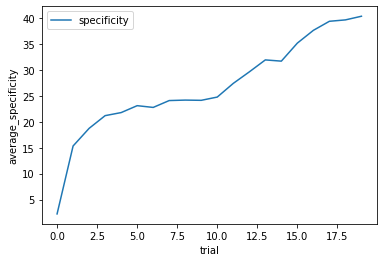

In [15]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


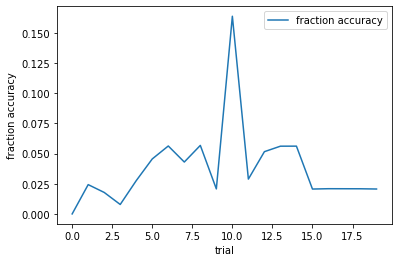

In [16]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


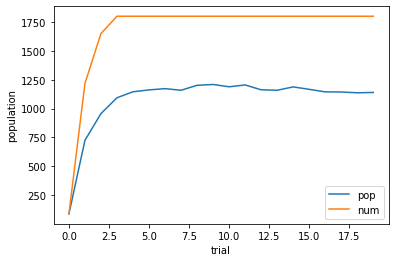

In [17]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


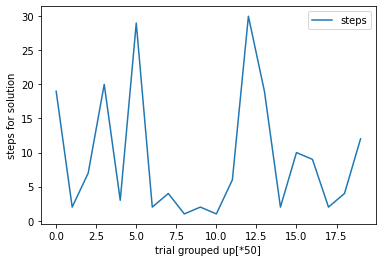

In [18]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
